In [2]:
function histograma(A::Array,N::Int)
    # Queremos ir contando cuantos números caen en cada intervalo antes de saber cuales son los intervalos, 
    # así que necesitamos ir modificando los intervalos conforme obtenemos mas información.
    # ¿Pero se puede hacer sin aceptar un error estadístico?
    # creo que no, no se me ocurre como, así que lo haré en dos pases en lugar de uno,

    
    sup,inf=extrema(A); #primer pase para encontrar el sup y el inf :(
    
    bins=zeros(Int,N+2);
    
    rng=(sup-inf)/N;
    
    for a in A #segundo pase
        bins[ceil(Int,((a-inf)/rng))+1]+=1
    end
    
    deleteat!(bins,N+2)
    deleteat!(bins,1)
    bins[1]+=1
    
    return bins    
end

histograma (generic function with 1 method)

In [3]:
#probando la funcion
histograma(randn(1000),10)

10-element Array{Int64,1}:
   5
  36
  84
 186
 251
 228
 135
  50
  17
   8

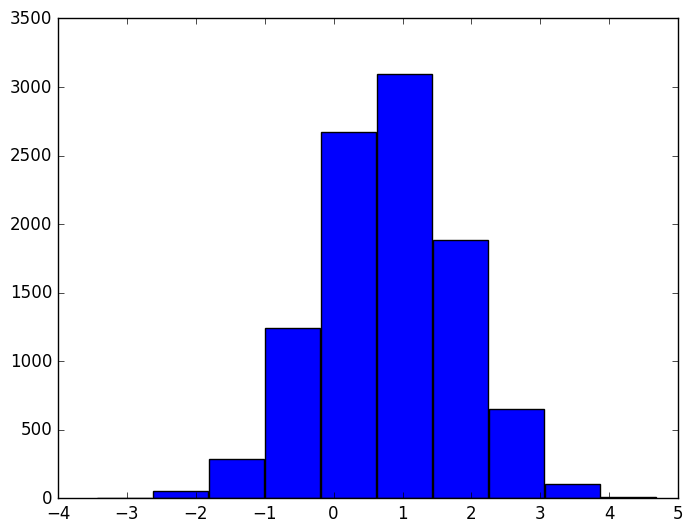

(PyObject <matplotlib.patches.Rectangle object at 0x00000000188F6908>,PyObject <matplotlib.patches.Rectangle object at 0x00000000187CE0F0>,PyObject <matplotlib.patches.Rectangle object at 0x00000000187FBFD0>,PyObject <matplotlib.patches.Rectangle object at 0x00000000187FBD30>,PyObject <matplotlib.patches.Rectangle object at 0x00000000187F65C0>,PyObject <matplotlib.patches.Rectangle object at 0x0000000018C0DA20>,PyObject <matplotlib.patches.Rectangle object at 0x00000000187FBDD8>,PyObject <matplotlib.patches.Rectangle object at 0x0000000018C047B8>,PyObject <matplotlib.patches.Rectangle object at 0x0000000018C14F98>,PyObject <matplotlib.patches.Rectangle object at 0x00000000187FBD68>)

In [4]:
n=10000
lista=randn(n)

#Grafica manual
N=10
sup,inf=extrema(lista);
rng=(sup-inf)/N;

X=[inf]
for i=1:N-1
    push!(X,inf+(i*rng))
end
using PyPlot
bar(X,histograma(lista,N))

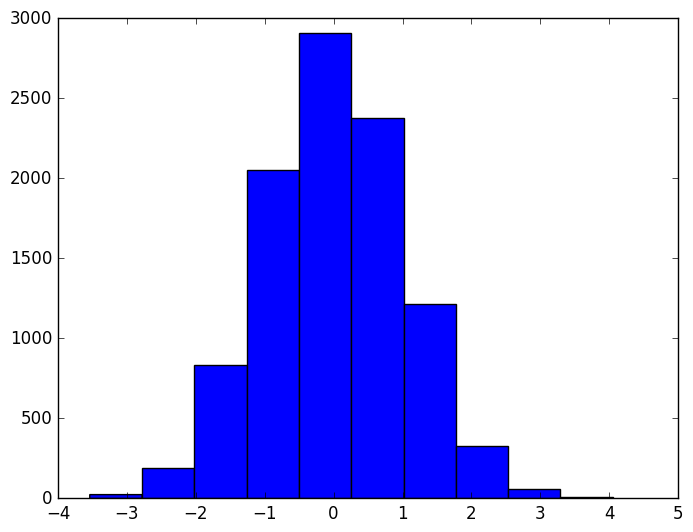

([24.0,193.0,834.0,2050.0,2912.0,2379.0,1218.0,328.0,56.0,6.0],[-3.53980662847894,-2.780603161669086,-2.0213996948592317,-1.2621962280493775,-0.5029927612395233,0.2562107055703309,1.015414172380185,1.7746176391900392,2.5338211059998934,3.2930245728097476,4.052228039619601],Any[PyObject <matplotlib.patches.Rectangle object at 0x00000000193499B0>,PyObject <matplotlib.patches.Rectangle object at 0x00000000192221D0>,PyObject <matplotlib.patches.Rectangle object at 0x0000000019230748>,PyObject <matplotlib.patches.Rectangle object at 0x0000000019235710>,PyObject <matplotlib.patches.Rectangle object at 0x000000001922C3C8>,PyObject <matplotlib.patches.Rectangle object at 0x00000000192352B0>,PyObject <matplotlib.patches.Rectangle object at 0x00000000192359E8>,PyObject <matplotlib.patches.Rectangle object at 0x000000001923FDD8>,PyObject <matplotlib.patches.Rectangle object at 0x000000001923FDA0>,PyObject <matplotlib.patches.Rectangle object at 0x0000000019235198>])

In [17]:
#Grafica PyPlot
plt[:hist](lista,N)

In [73]:
#Mean
function meanb(A::Array)
    sum(A)/length(A)
end
print("Mean de funcion hecha a mano: ",meanb(histograma(lista,N)),"\n")
print("Mean de funcion de julia: ",mean(histograma(lista,N)))

Mean de funcion hecha a mano: 1000.0
Mean de funcion de julia: 1000.0

In [75]:
#Var
function varb(A::Array)
    m=meanb(A)
    sumabs2(A-m)/(length(A)-1)
end
print("Var de funcion hecha a mano: ",varb(histograma(lista,N)),"\n")
print("Var de funcion de julia: ",var(histograma(lista,N)))

Var de funcion hecha a mano: 1.2207793333333333e6
Var de funcion de julia: 1.2207793333333333e6

In [179]:
#Algoritmo recursivo from Wikipedia
function online_variance(data)
    n = 0
    mean = 0.0
    M = 0.0
     
    for x in data
        n += 1
        delta = x - mean
        mean += delta/n
        M += delta*(x - mean)
    end
    
    if n<2
        error("n<2")
    else
        return M/(n-1)
    end
end
online_variance(histograma(lista,N))

1.2207793333333333e6

In [149]:
#velocity comparation

for i=1:7
        m=10^i
        A=randn(m)
        
        print (m," datos \n")
        print ("  varb--  ")
        @time varb(A)
        print ("  var--   ")
        @time var(A)
        print ("  online--")
        @time online_variance(A)
        print ("\n")
end


10 datos 
  varb--    0.000002 seconds (1 allocation: 144 bytes)
  var--     0.000003 seconds (3 allocations: 112 bytes)
  online--  0.000001 seconds (1 allocation: 16 bytes)

100 datos 
  varb--    0.000003 seconds (1 allocation: 896 bytes)
  var--     0.000002 seconds (3 allocations: 112 bytes)
  online--  0.000001 seconds (1 allocation: 16 bytes)

1000 datos 
  varb--    0.000004 seconds (1 allocation: 7.891 KB)
  var--     0.000002 seconds (3 allocations: 112 bytes)
  online--  0.000010 seconds (1 allocation: 16 bytes)

10000 datos 
  varb--    0.000028 seconds (2 allocations: 78.188 KB)
  var--     0.000013 seconds (3 allocations: 112 bytes)
  online--  0.000096 seconds (1 allocation: 16 bytes)

100000 datos 
  varb--    0.000658 seconds (2 allocations: 781.313 KB)
  var--     0.000355 seconds (3 allocations: 112 bytes)
  online--  0.000970 seconds (1 allocation: 16 bytes)

1000000 datos 
  varb--    0.009642 seconds (2 allocations: 7.629 MB)
  var--     0.003564 seconds (3 alloca

In [ ]:
#La que trae ya Julia parece ir ganando

In [180]:
function simpsoms(f,a,b,n)
    if isodd(n)
        error("N is odd number")
    end
    d=(b-a)/n
    I=f(a)+f(b)
    for i=1:n-1
        I+=(f(a+(d*i)))*(3+((-1)^(i+1)))
    end
    I*(d/3)
end
#Test
f(x)=1/(1+(x^5))
simpsoms(f,0,3,6)

1.0749152777561413